# PYTHON PROJECT  " TELECOM CHURN ANALYSIS"

# IMPORTING RELEVENT LIBRARIES

In [1]:
import pandas as pd                                    #FOR DATAFRAME OPERATIONS
import matplotlib.pyplot as plt                        #FOR PLOTTING GRAPHS
import seaborn as sns                                  #FOR PLOTTING GRAPHS
from sklearn.cross_validation import train_test_split  
from sklearn.linear_model import LogisticRegression    #IMPORTING LINEAR REGRESSION FUNCTION FROM SCIKIT-LEARN LIBRARY
from sklearn import preprocessing     
from sklearn import metrics   
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None 

C:\Users\AISHWARYA SHARMA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# IMPORTING  DATASET USING "read_csv()" FUNCTION.

In [2]:
    data=pd.read_csv("/Users/AISHWARYA SHARMA/Documents/Dataset/CHURN DATA.csv")

# PRINTING DATASET

In [3]:
data

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
5       AL             118        510     391-8027                yes   
6       MA             121        510     355-9993                 no   
7       MO             147        415     329-9001                yes   
8       LA             117        408     335-4719                 no   
9       WV             141        415     330-8173                yes   
10      IN              65        415     329-6603                 no   
11      RI              74        415     344-9403                 no   
12      IA             168        408     363-1107                 no   
13      MT              95        510     394-8006                 no   
14      IA              62        415     366-9238                 no   
15      NY             161        415     351-7269                 no   
16      ID              85        408     350-8884                 no   
17      VT              93        510     386-2923                 no   
18      VA              76        510     356-2992                 no   
19      TX              73        415     373-2782                 no   
20      FL             147        415     396-5800                 no   
21      CO              77        408     393-7984                 no   
22      AZ             130        415     358-1958                 no   
23      SC             111        415     350-2565                 no   
24      VA             132        510     343-4696                 no   
25      NE             174        415     331-3698                 no   
26      WY              57        408     357-3817                 no   
27      MT              54        408     418-6412                 no   
28      MO              20        415     353-2630                 no   
29      HI              49        510     410-7789                 no   
...    ...             ...        ...          ...                ...   
3303    WI             114        415     373-7308                 no   
3304    IL              71        510     330-7137                yes   
3305    IN              58        415     406-8445                 no   
3306    AL             106        408     404-5283                 no   
3307    OK             172        408     398-3632                 no   
3308    IA              45        415     399-5763                 no   
3309    VT             100        408     340-9449                yes   
3310    NY              94        415     363-1123                 no   
3311    LA             128        415     361-2170                 no   
3312    SC             181        408     406-6304                 no   
3313    ID             127        408     392-5090                 no   
3314    MO              89        415     373-7713                 no   
3315    ME             149        415     392-1376                 no   
3316    MS             103        510     390-6388                 no   
3317    SD             163        415     379-7290                yes   
3318    OK              52        415     397-9928                 no   
3319    WY              89        415     378-6924                 no   
3320    GA             122        510     411-5677                yes   
3321    VT              60        415     400-2738                 no   
3322    MD              62        408     409-1856                 no   
3323    IN             117        415     362-5899                 no   
3324    WV             159        415     377-1164                 no   
3325    OH              78        408     368-8555             

#                                     EXPLORATION OF DATA

# 1)PRINTING ROWS &COLUMNS IN DATASET USING "data.shape" FUNCTION

In [4]:
data.shape

(3333, 21)

DATA CONSISTS OF 3333 ROWS & 21 COLUMNS

#  2)PRINTING NAME OF COLUMNS USING ".columns"FUNCTION

In [5]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# 3) INFORMATION OF THE DATASET USING "data.info" FUNCTION

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

HERE WE HAVE NO MISSING DATA VALUES

# 4) PRINTING FIRST 5 DATA ENTRIES USING PANDAS "data.head()" FUNCTION "INDEXING=[0-4]".

In [7]:
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

# 5) PRINTING LAST 5 DATA ENTRY USING PANDAS "data.tail()" FUNCTION "INDEXING[3328-3332]"

In [8]:
data.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...    total eve calls  \
3328               77             26.55  ...                126   
3329               57             39.29  ...                 55   
3330              109             30.74  ...                 58   
3331              105             36.35  ...                 84   
3332              113             39.85  ...                 82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

# DESCRIBING DATASET USING "data.describe()" FUNCTION.

In [9]:
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

# ANALYSIS & VISULAIZATION

#  COUNTING CHURNED(True),NON CHURNED(FALSE)

In [10]:
data["churn"].unique()     #FINDING UNIQUE VALUES USING (".unique()") FUNCTION.

array([False,  True])

In [11]:
data["churn"].value_counts()     #COUNTING UNIQUE VALUES IN "churn" COLUMN BY PANDAS USING (".value_counts()") FUNCTION.                                                   

False    2850
True      483
Name: churn, dtype: int64

#   PERCENTAGE OF PEOPLE WHO "CHURNED" VS "NON CHURNED"

In [12]:
Percentage_Churn=data.churn.value_counts() / len(data.churn)*100
Percentage_Churn

False    85.508551
True     14.491449
Name: churn, dtype: float64

##### CONCLUSION: CUSTOMER CHURNED=14.50%  , NON CHURNED CUSTOMER= 85.5%  .  CHURN PERCENTAGE IS VERY LOW IN GIVEN DATA

# PLOTTING BAR GRAPH OF CHURN VS NON CHURNED USING "value_count()"

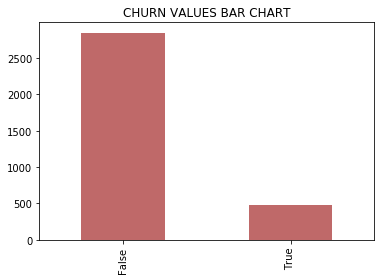

In [13]:
data.churn.value_counts().plot(kind='bar', color="brown", alpha=.7) #PLOTTING BAR GRAPH OF SINGLE COLUMN "churn" with its value counts
plt.title("CHURN VALUES BAR CHART")
plt.show()

# GROUPING DATA ACCORDING TO "churn" column

In [14]:
Churn=data.groupby(["churn"]).count()
Churn

state  account length  area code  phone number  international plan  \
churn                                                                       
False   2850            2850       2850          2850                2850   
True     483             483        483           483                 483   

       voice mail plan  number vmail messages  total day minutes  \
churn                                                              
False             2850                   2850               2850   
True               483                    483                483   

       total day calls  total day charge  total eve minutes  total eve calls  \
churn                                                                          
False             2850              2850               2850             2850   
True               483               483                483              483   

       total eve charge  total night minutes  total night calls  \
churn                                                             
False              2850                 2850               2850   
True                483                  483                483   

       total night charge  total intl minutes  total intl calls  \
churn                                                             
False                2850                2850              2850   
True                  483                 483               483   

       total intl charge  customer service calls  
churn                                             
False               2850                    2850  
True                 483                     483

# BARPLOT USING "plt" FUNCTION

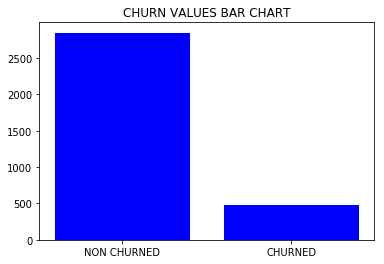

In [15]:
plt.bar([1,2],Churn['state'].tolist(), align='center',color='blue')
plt.xticks([1,2], ['NON CHURNED','CHURNED'])
plt.title("CHURN VALUES BAR CHART")
plt.show()

# PIE PLOT BETWEEN NON-CHURNED,CHURNED

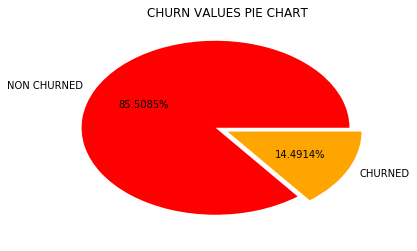

In [16]:
colors = ['red', 'orange']
explode = (0.1, 0)
plt.pie(Churn['state'].tolist(),labels=['NON CHURNED','CHURNED'],explode=explode,colors=colors,\
        shadow=False,autopct='%1.4f%%')
plt.title("CHURN VALUES PIE CHART")
plt.show()

#  GROUPING MULTIPLE COLUMNS & PLOTTING BETWEEN THEM.

In [17]:
data.groupby(["state","churn"]).count().head(4)

account length  area code  phone number  international plan  \
state churn                                                                
AK    False              49         49            49                  49   
      True                3          3             3                   3   
AL    False              72         72            72                  72   
      True                8          8             8                   8   

             voice mail plan  number vmail messages  total day minutes  \
state churn                                                              
AK    False               49                     49                 49   
      True                 3                      3                  3   
AL    False               72                     72                 72   
      True                 8                      8                  8   

             total day calls  total day charge  total eve minutes  \
state churn                                                         
AK    False               49                49                 49   
      True                 3                 3                  3   
AL    False               72                72                 72   
      True                 8                 8                  8   

             total eve calls  total eve charge  total night minutes  \
state churn                                                           
AK    False               49                49                   49   
      True                 3                 3                    3   
AL    False               72                72                   72   
      True                 8                 8                    8   

             total night calls  total night charge  total intl minutes  \
state churn                                                              
AK    False                 49                  49                  49   
      True                   3                   3                   3   
AL    False                 72                  72                  72   
      True                   8                   8                   8   

             total intl calls  total intl charge  customer service calls  
state churn                                                               
AK    False                49                 49                      49  
      True                  3                  3                       3  
AL    False                72                 72                      72  
      True                  8                  8                       8

# ANALYSIS BETWEEN STATE & CHURN USING BARPLOT

Text(0.5,1,'STATEWISE CHURN')

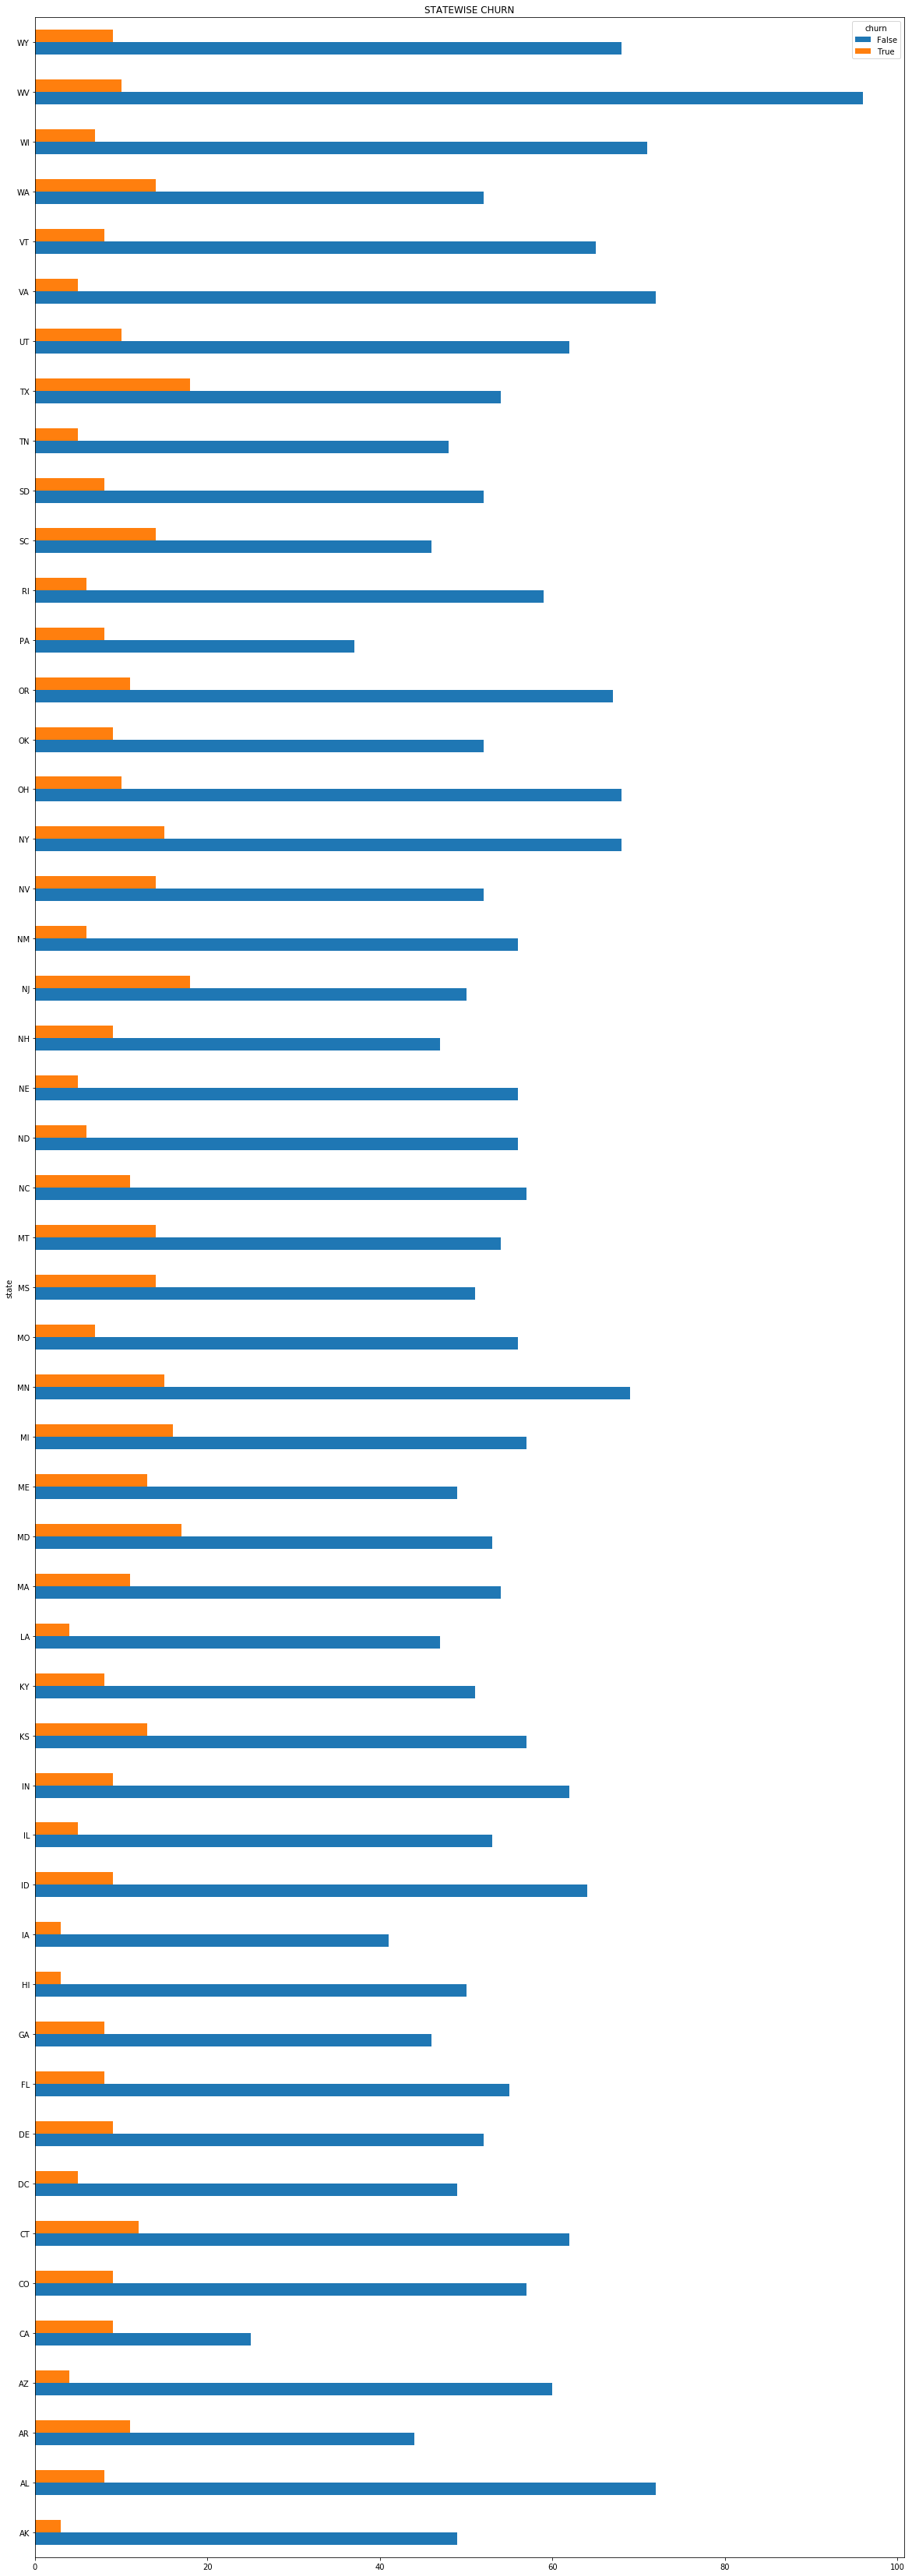

In [18]:
data.groupby(["state","churn"]).size().unstack().plot(kind="barh", stacked=False, figsize=(20,60)) 
plt.title("STATEWISE CHURN")   #PLOTTING HORIZONTAL BAR GRAPH OF PEOPLE WHO CHURNED ACCORDING TO STATE IN WHICH THEY LIVE                                    

# ANALYSIS BETWEEN AREA CODE &  CUSTOMER CHURN

In [19]:
data.groupby(["area code","churn"]).count().head(4)

state  account length  phone number  international plan  \
area code churn                                                            
408       False    716             716           716                 716   
          True     122             122           122                 122   
415       False   1419            1419          1419                1419   
          True     236             236           236                 236   

                 voice mail plan  number vmail messages  total day minutes  \
area code churn                                                              
408       False              716                    716                716   
          True               122                    122                122   
415       False             1419                   1419               1419   
          True               236                    236                236   

                 total day calls  total day charge  total eve minutes  \
area code churn                                                         
408       False              716               716                716   
          True               122               122                122   
415       False             1419              1419               1419   
          True               236               236                236   

                 total eve calls  total eve charge  total night minutes  \
area code churn                                                           
408       False              716               716                  716   
          True               122               122                  122   
415       False             1419              1419                 1419   
          True               236               236                  236   

                 total night calls  total night charge  total intl minutes  \
area code churn                                                              
408       False                716                 716                 716   
          True                 122                 122                 122   
415       False               1419                1419                1419   
          True                 236                 236                 236   

                 total intl calls  total intl charge  customer service calls  
area code churn                                                               
408       False               716                716                     716  
          True                122                122                     122  
415       False              1419               1419                    1419  
          True                236                236                     236

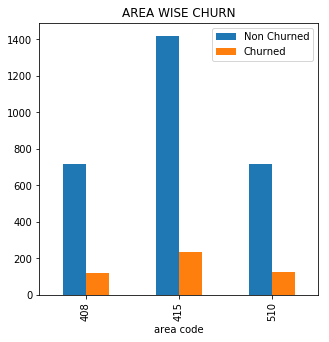

In [20]:
data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5)) 
plt.title("AREA WISE CHURN")
plt.legend(labels=['Non Churned','Churned'])

# ANALYSIS BETWEEN INTERNATIONAL PLAN & CUSTOMER CHURN

In [21]:
data.groupby(["international plan","churn"]).count().head(4)

state  account length  area code  phone number  \
international plan churn                                                   
no                 False   2664            2664       2664          2664   
                   True     346             346        346           346   
yes                False    186             186        186           186   
                   True     137             137        137           137   

                          voice mail plan  number vmail messages  \
international plan churn                                           
no                 False             2664                   2664   
                   True               346                    346   
yes                False              186                    186   
                   True               137                    137   

                          total day minutes  total day calls  \
international plan churn                                       
no                 False               2664             2664   
                   True                 346              346   
yes                False                186              186   
                   True                 137              137   

                          total day charge  total eve minutes  \
international plan churn                                        
no                 False              2664               2664   
                   True                346                346   
yes                False               186                186   
                   True                137                137   

                          total eve calls  total eve charge  \
international plan churn                                      
no                 False             2664              2664   
                   True               346               346   
yes                False              186               186   
                   True               137               137   

                          total night minutes  total night calls  \
international plan churn                                           
no                 False                 2664               2664   
                   True                   346                346   
yes                False                  186                186   
                   True                   137                137   

                          total night charge  total intl minutes  \
international plan churn                                           
no                 False                2664                2664   
                   True                  346                 346   
yes                False                 186                 186   
                   True                  137                 137   

                          total intl calls  total intl charge  \
international plan churn                                        
no                 False              2664               2664   
                   True                346                346   
yes                False               186                186   
                   True                137                137   

                          customer service calls  
international plan churn                          
no                 False                    2664  
                   True                      346  
yes                False                     186  
                   True                      137

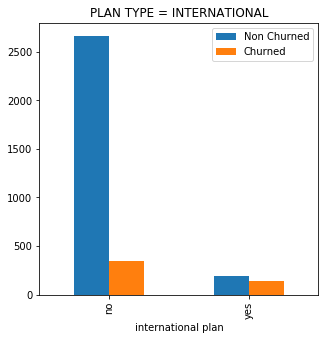

In [22]:
data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5)) 
plt.title("PLAN TYPE = INTERNATIONAL")
plt.legend(labels=['Non Churned','Churned'])

# ANALYSIS BETWEEN VOICE MAIL PLAN & CUSTOMER CHURN

In [23]:
data.groupby(["voice mail plan","churn"]).count().head(4)

state  account length  area code  phone number  \
voice mail plan churn                                                   
no              False   2008            2008       2008          2008   
                True     403             403        403           403   
yes             False    842             842        842           842   
                True      80              80         80            80   

                       international plan  number vmail messages  \
voice mail plan churn                                              
no              False                2008                   2008   
                True                  403                    403   
yes             False                 842                    842   
                True                   80                     80   

                       total day minutes  total day calls  total day charge  \
voice mail plan churn                                                         
no              False               2008             2008              2008   
                True                 403              403               403   
yes             False                842              842               842   
                True                  80               80                80   

                       total eve minutes  total eve calls  total eve charge  \
voice mail plan churn                                                         
no              False               2008             2008              2008   
                True                 403              403               403   
yes             False                842              842               842   
                True                  80               80                80   

                       total night minutes  total night calls  \
voice mail plan churn                                           
no              False                 2008               2008   
                True                   403                403   
yes             False                  842                842   
                True                    80                 80   

                       total night charge  total intl minutes  \
voice mail plan churn                                           
no              False                2008                2008   
                True                  403                 403   
yes             False                 842                 842   
                True                   80                  80   

                       total intl calls  total intl charge  \
voice mail plan churn                                        
no              False              2008               2008   
                True                403                403   
yes             False               842                842   
                True                 80                 80   

                       customer service calls  
voice mail plan churn                          
no              False                    2008  
                True                      403  
yes             False                     842  
                True                       80

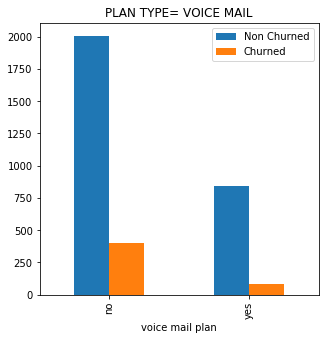

In [24]:
data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5)) 
plt.title("PLAN TYPE= VOICE MAIL")
plt.legend(labels=['Non Churned','Churned'])

# ANALYSIS TOTAL NIGHT CALLS & CUSTOMER CHURN

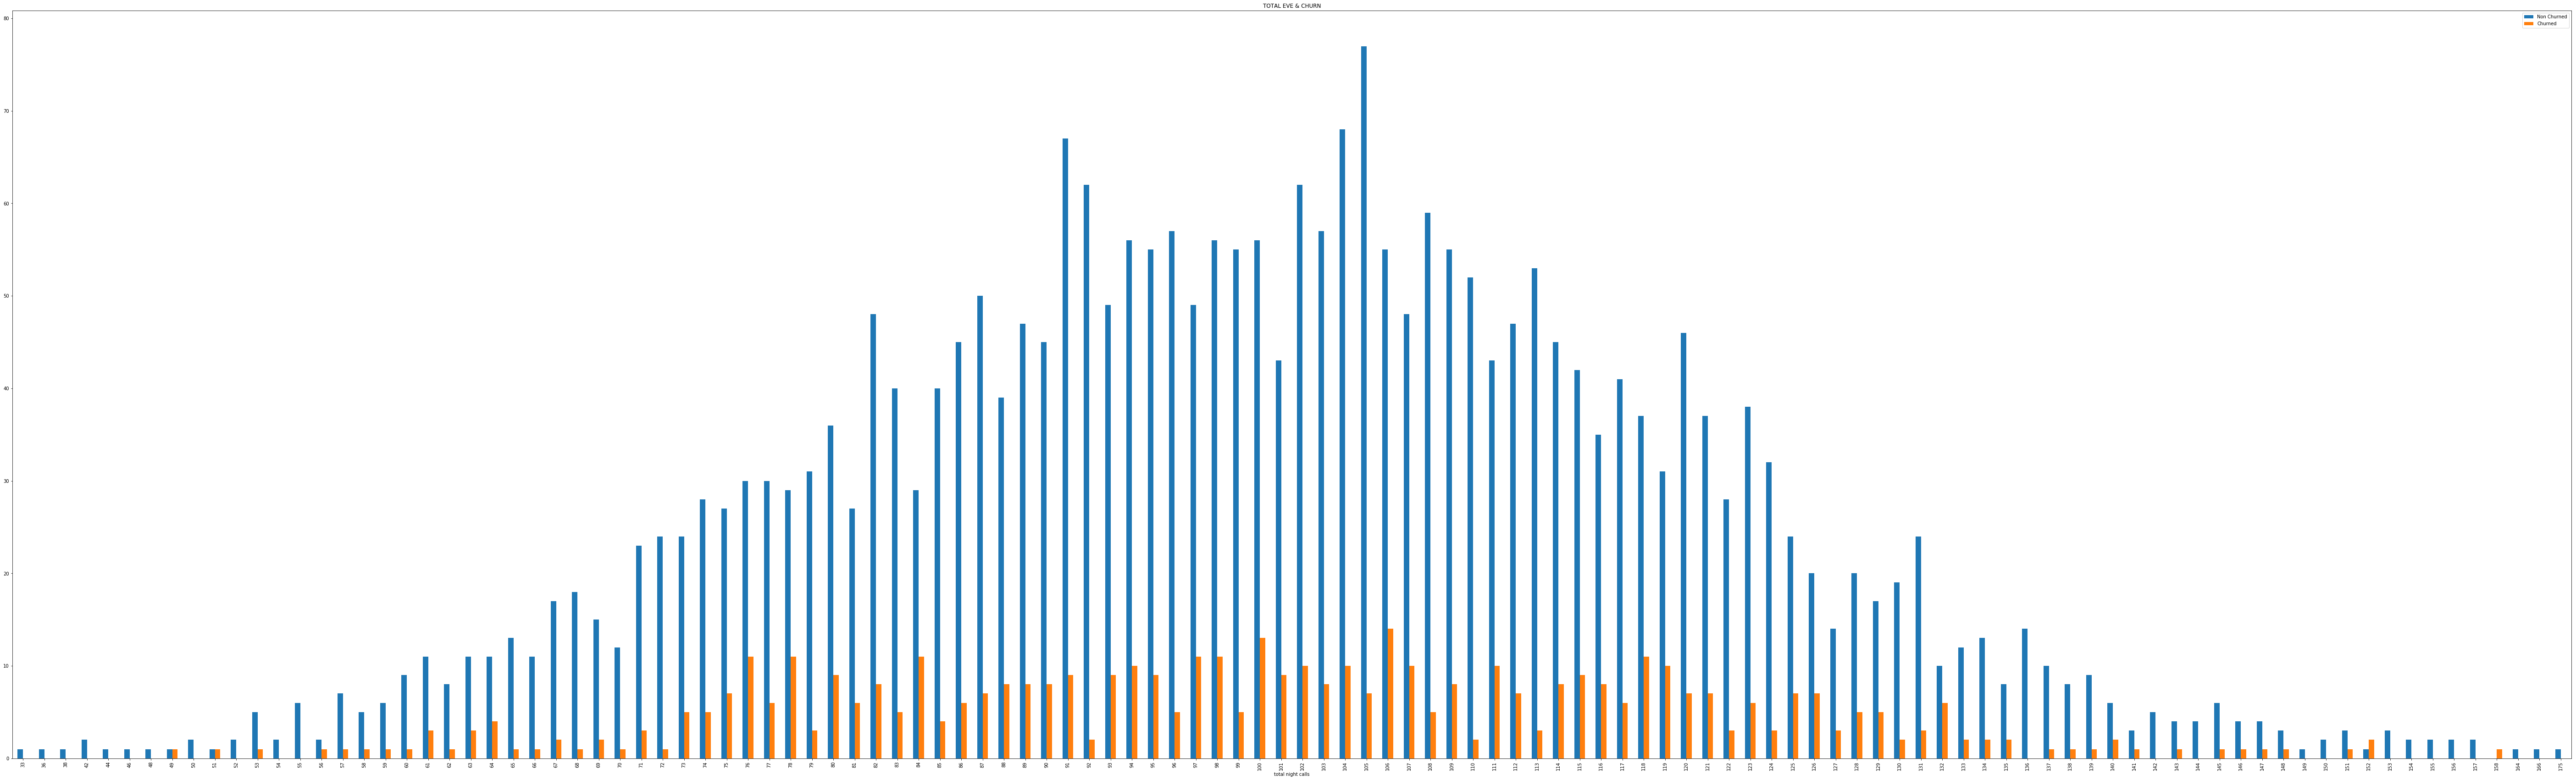

In [25]:
data.groupby(["total night calls", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(100,30)) 
plt.title("TOTAL EVE & CHURN")
plt.legend(labels=['Non Churned','Churned'])

# ANALYSIS TOTAL NIGHT CALLS & CUSTOMER CHURN

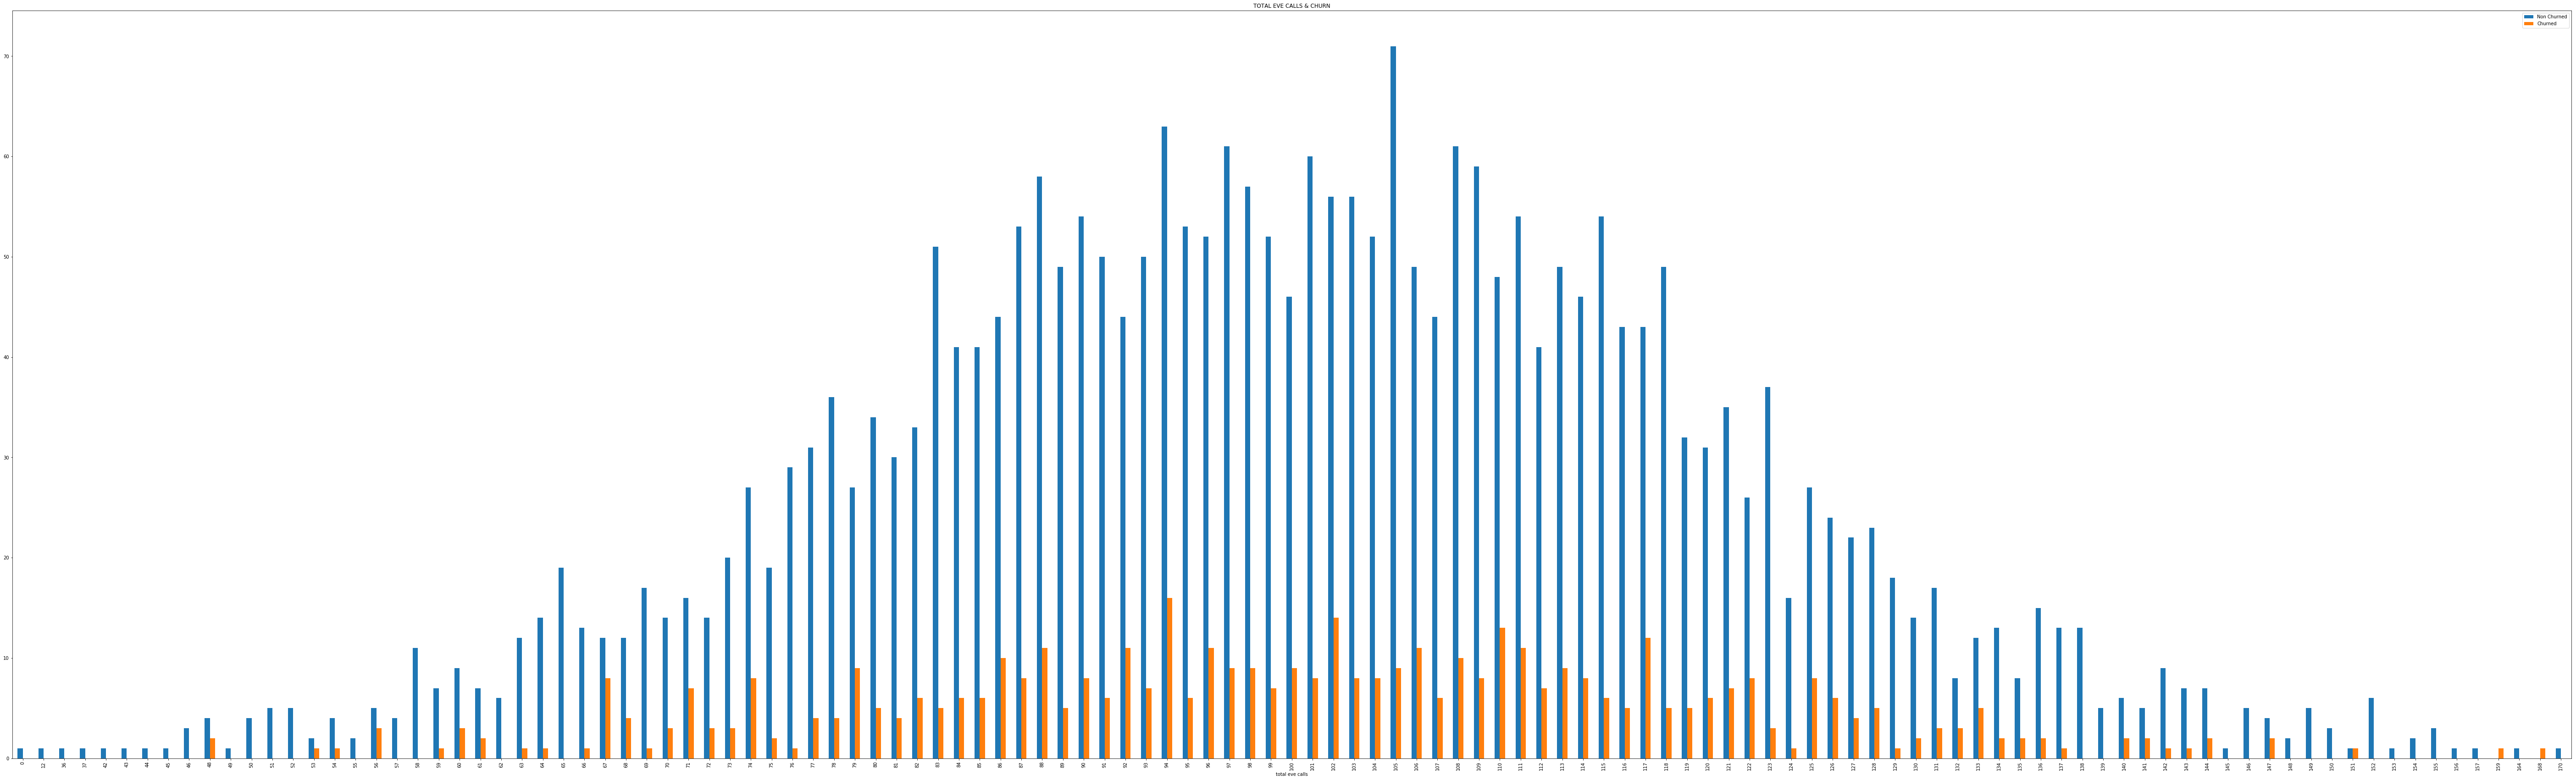

In [26]:
data.groupby(["total eve calls", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(100,30)) 
plt.title("TOTAL EVE CALLS & CHURN")
plt.legend(labels=['Non Churned','Churned'])

# ANALYSIS TOTAL DAY CALLS & CUSTOMER CHURN

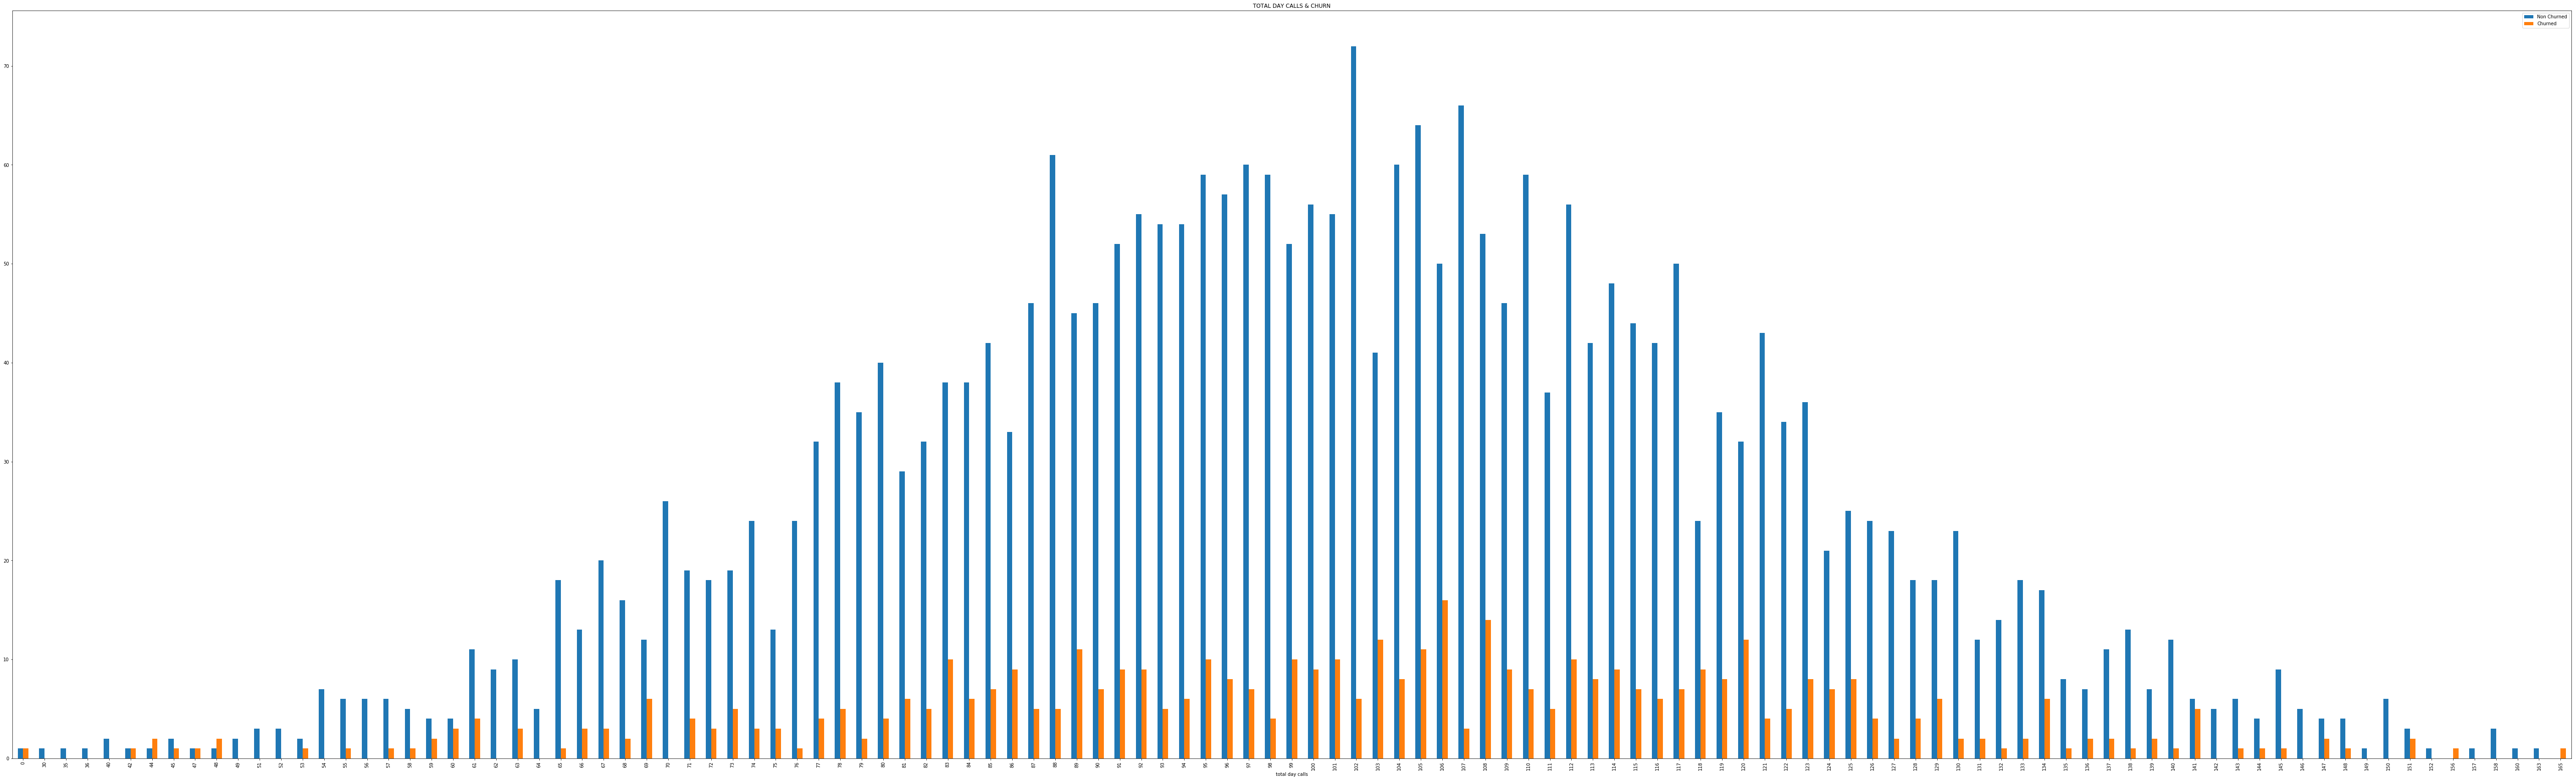

In [27]:
data.groupby(["total day calls", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(100,30)) 
plt.title("TOTAL DAY CALLS & CHURN")
plt.legend(labels=['Non Churned','Churned'])

# ANALYSIS TOTAL CALLS & CUSTOMER CHURN

#  CREATED NEW COLUMN :total_calls

In [28]:
data["total_calls"]=data["total day calls"]+data["total night calls"]+data["total eve calls"]

In [29]:
data["total_calls"].describe()

count    3333.000000
mean      300.657666
std        34.328232
min       188.000000
25%       278.000000
50%       301.000000
75%       324.000000
max       410.000000
Name: total_calls, dtype: float64

# PLOT BETWEEN TOTAL CALLS AND CUSTOMER CHURN

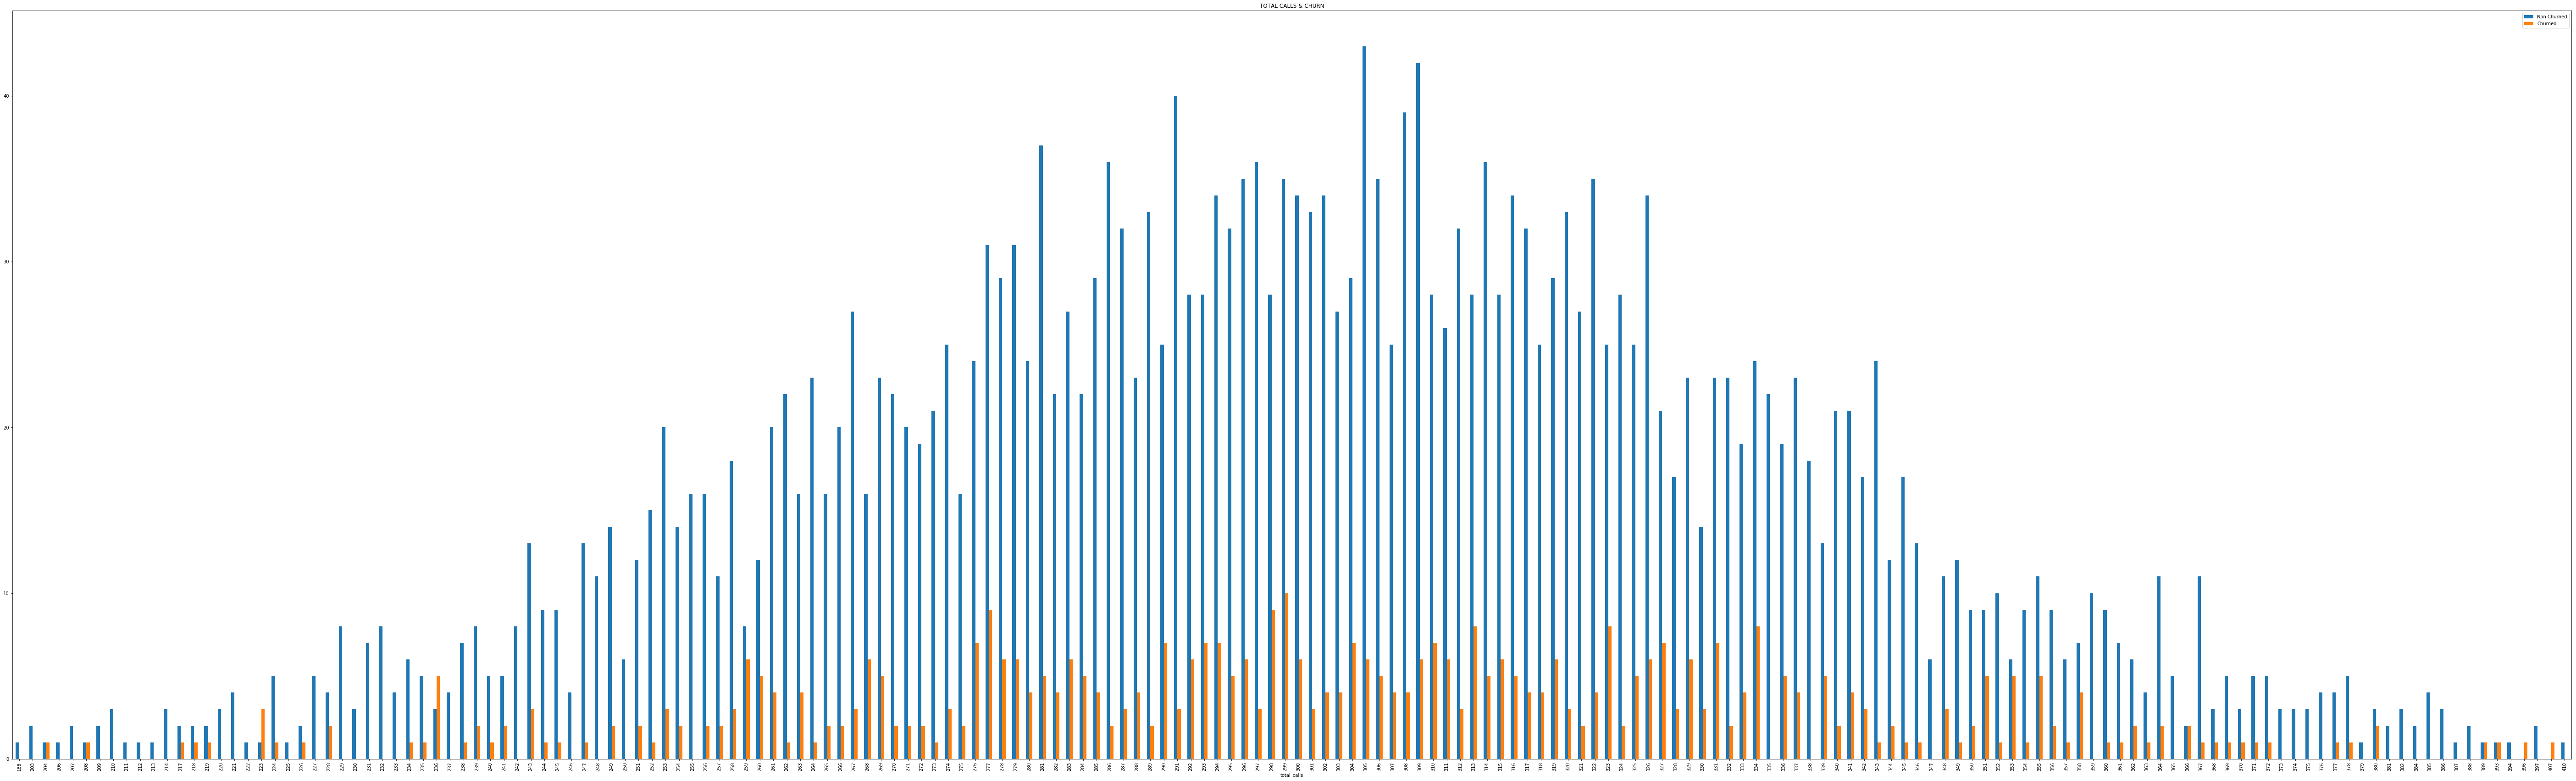

In [30]:
data.groupby(["total_calls", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(100,30)) 
plt.title("TOTAL CALLS & CHURN")
plt.legend(labels=['Non Churned','Churned'])

# CHURN ANALYSIS WITH TOAL CALLS >250 

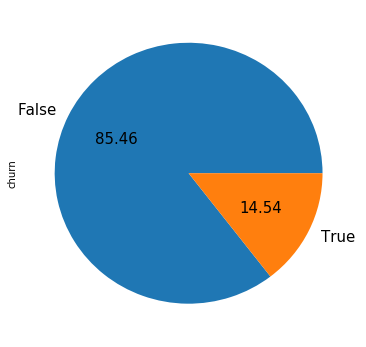

In [31]:
call_churn=data[data.total_calls>=250]["churn"].value_counts().plot(kind="pie", autopct='%.2f',figsize=(6,6),fontsize=15)

# ANALYSIS TOTAL CHARGE & CUSTOMER CHURN

# CREATED COLUMN: TOTAL CHARGE 

In [32]:
data["total_charge"]=data["total day charge"]+data["total eve charge"]+data["total night charge"]

# PLOT BETWEEN TOTAL CHARGE AND CUSTOMER CHURN

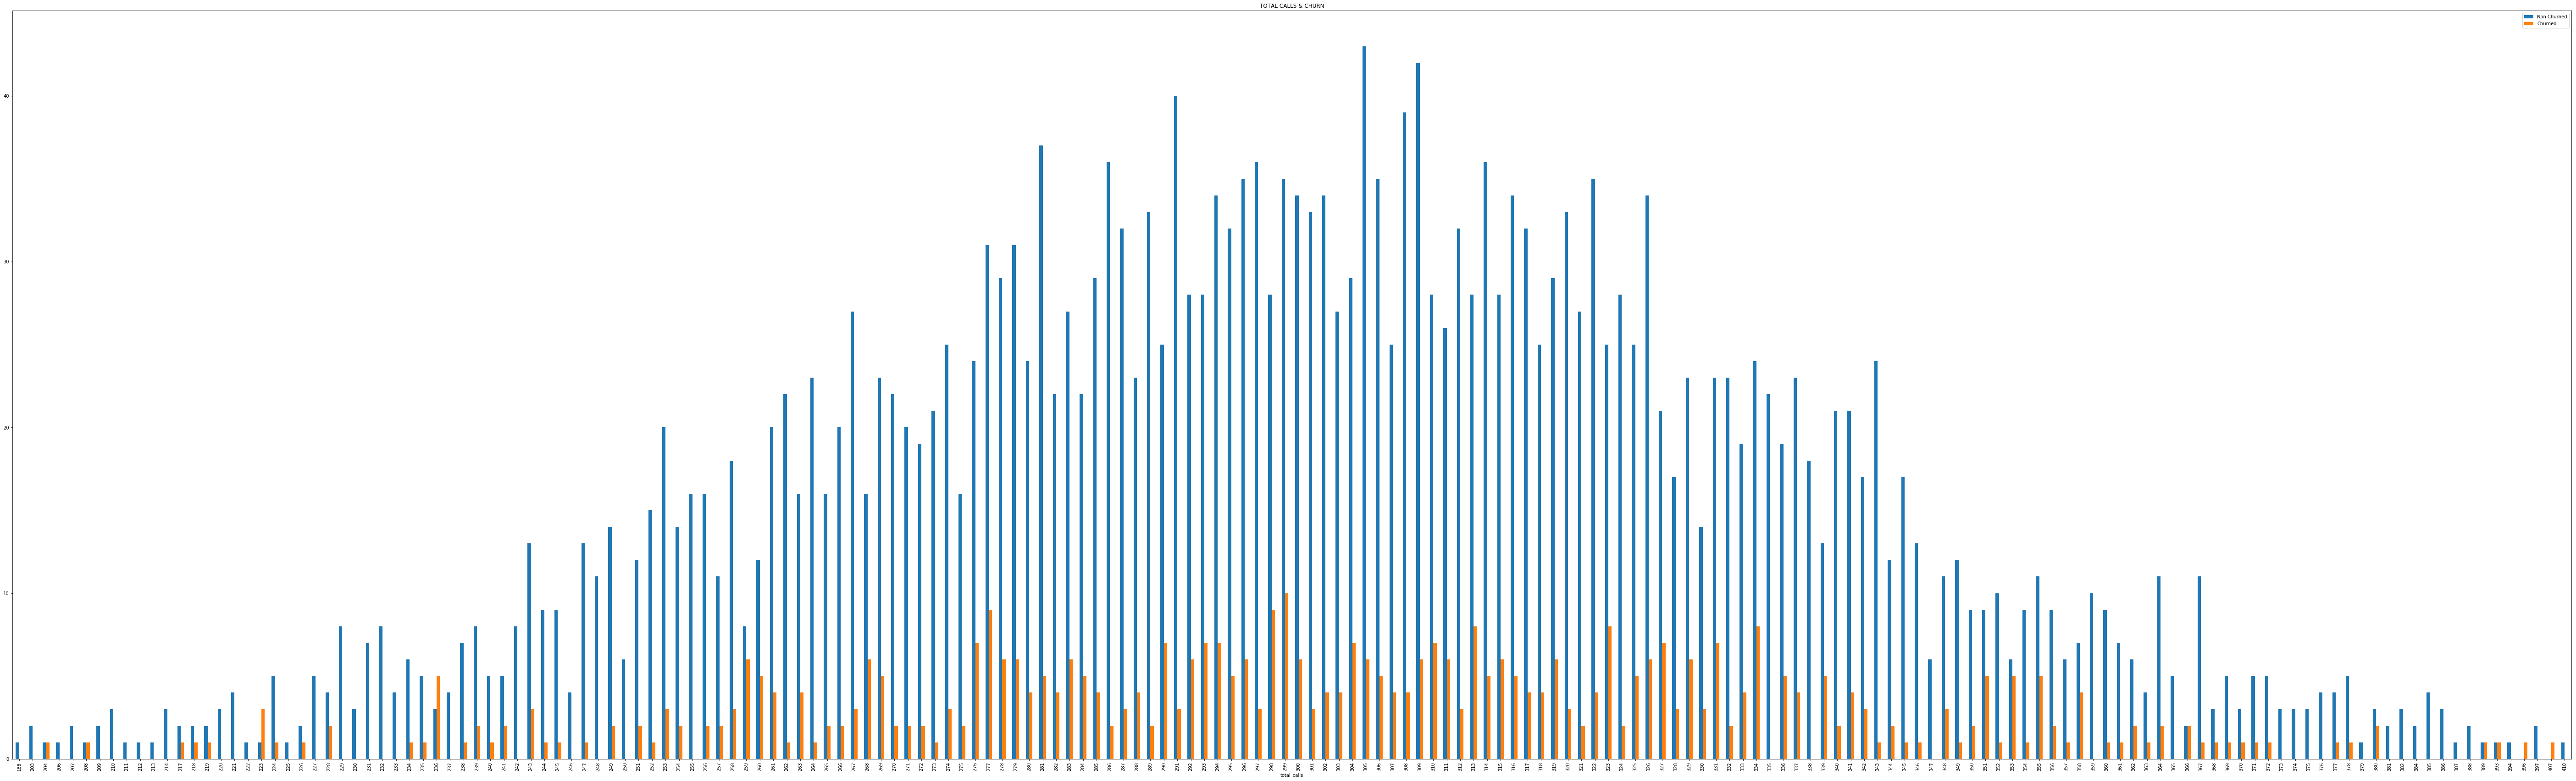

In [33]:
data.groupby(["total_calls", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(100,30)) 
plt.title("TOTAL CALLS & CHURN")
plt.legend(labels=['Non Churned','Churned'])

# CHURN ANALYSIS WITH TOATAL CHARGE>60

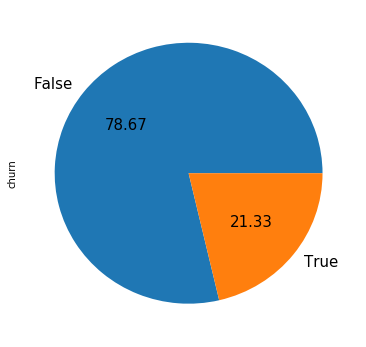

In [34]:
charge_churn=data[data.total_charge>=60]["churn"].value_counts().plot(kind="pie", autopct='%.2f',figsize=(6,6),fontsize=15)

# ANALYSIS TOTAL TIME & CUSTOMER CHURN

#  CREATING NEW COLUMN TOTAL TIME

In [35]:
data["total_time"]=data["total day minutes"]+data["total eve minutes"]+data["total night minutes"]

# CHURN ANALYSIS WITH TOATAL TIME>500

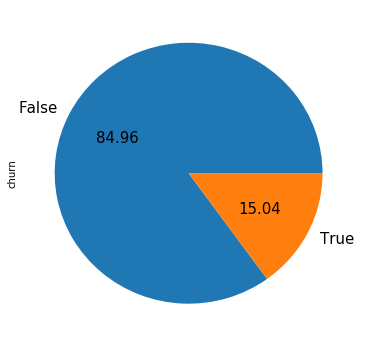

In [36]:
time_churn=data[data.total_time>=500]["churn"].value_counts().plot(kind="pie", autopct='%.2f',figsize=(6,6),fontsize=15)

# ANALYSIS BETWEEN CUSTOMER SERVICE CALLS & CUSTOMER CHURN

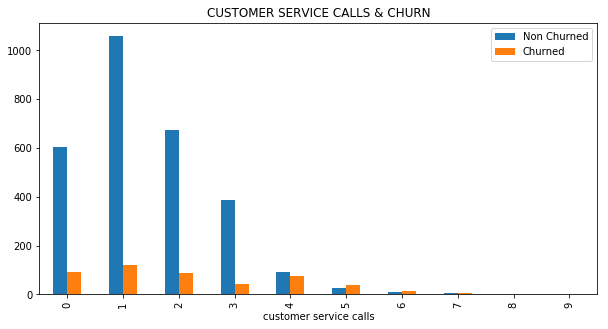

In [37]:
data.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar',stacked=False, figsize=(10,5)) 
plt.title("CUSTOMER SERVICE CALLS & CHURN")
plt.legend(labels=['Non Churned','Churned'])

 # PREPROCESSING 


#  1) SELECTING FEATURES

In [38]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'total_calls', 'total_charge',
       'total_time'],
      dtype='object')

In [39]:
data.head(1)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   

   total day charge     ...      total night calls  total night charge  \
0             45.07     ...                     91               11.01   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3                2.7   

   customer service calls  churn  total_calls  total_charge  total_time  
0                       1  False          300         72.86       707.2  

[1 rows x 24 columns]

# NEW DATAFRAME WITH SELECTED COLUMNS

In [40]:
df=data[["churn","account length","international plan","voice mail plan","total_calls","total_charge","customer service calls","total_time","total intl calls","total intl charge"]]

In [41]:
df.head(3)

churn  account length international plan voice mail plan  total_calls  \
0  False             128                 no             yes          300   
1  False             107                 no             yes          329   
2  False             137                 no              no          328   

   total_charge  customer service calls  total_time  total intl calls  \
0         72.86                       1       707.2                 3   
1         55.54                       1       611.5                 3   
2         59.00                       0       527.2                 5   

   total intl charge  
0               2.70  
1               3.70  
2               3.29

#  DATA TRANSFORM USING "LabelEncoder()" FUNCTION

In [42]:
label_encoder = preprocessing.LabelEncoder()

In [43]:
df['international plan'] = label_encoder.fit_transform(df['international plan']) #CHANGED VALUES FROM "YES" "NO" TO 1,0

In [44]:
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])       #CHANGED VALUES FROM "YES" "NO" TO 1,0

In [45]:
df['churn'] = label_encoder.fit_transform(df['churn']) 

# EXPLORATION OF NEW DATA

In [46]:
df.shape

(3333, 10)

In [47]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
churn                     3333 non-null int32
account length            3333 non-null int64
international plan        3333 non-null int32
voice mail plan           3333 non-null int32
total_calls               3333 non-null int64
total_charge              3333 non-null float64
customer service calls    3333 non-null int64
total_time                3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
dtypes: float64(3), int32(3), int64(4)
memory usage: 221.4 KB


In [48]:
df.head(2)

churn  account length  international plan  voice mail plan  total_calls  \
0      0             128                   0                1          300   
1      0             107                   0                1          329   

   total_charge  customer service calls  total_time  total intl calls  \
0         72.86                       1       707.2                 3   
1         55.54                       1       611.5                 3   

   total intl charge  
0                2.7  
1                3.7

#  SPLITTING DATA INTO TRAIN & TEST

# 1)DEFINING DEPENDENT (Y) ,INDEPENDENT(X) DATASETS

In [49]:
X=df[["account length","international plan","voice mail plan","total_calls","total_charge","customer service calls","total_time","total intl calls","total intl charge"]]
Y=df["churn"]

# BREAKING DATA INTO TRAIN & TEST SETS

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)    # 70% training and 30 % test

#  NUMBER OF ROW & COLUMNS IN TRAIN & TEST SETS

In [51]:
X_train.shape

(2333, 9)

In [52]:
X_test.shape

(1000, 9)

In [53]:
y_test.shape

(1000,)

In [54]:
y_train.shape

(2333,)

# MODEL ACCURACY & PREDICTIONS

#  ACCURACY

In [55]:
logreg = LogisticRegression()

In [56]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
y_pred=logreg.predict(X_test)  #PREDICTION FUNCTION (".predict")

In [58]:
print("Accuracy score is=",metrics.accuracy_score(y_test, y_pred))

Accuracy score is= 0.858


#  PERDICTION

In [59]:
print(metrics.confusion_matrix(y_test, y_pred))

[[836  27]
 [115  22]]


# PART 2 MERGED PROJECT

# ANALYSIS ON  "BROADBAND INTERNET SERVICES CHURN" DATA

#                           FETCHING SECOND DATASET (READING EXCEL FILE)

In [60]:
df2=pd.read_excel("/Users/AISHWARYA SHARMA/Documents/Dataset/INTERNET SERVICES DATA.xlsx")

# PRINTING DATA

In [61]:
df2

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
16    8191-XWSZG  Female              0      No         No      52   
17    9959-WOFKT    Male              0      No        Yes      71   
18    4190-MFLUW  Female              0     Yes        Yes      10   
19    4183-MYFRB  Female              0      No         No      21   
20    8779-QRDMV    Male              1      No         No       1   
21    1680-VDCWW    Male              0     Yes         No      12   
22    1066-JKSGK    Male              0      No         No       1   
23    3638-WEABW  Female              0     Yes         No      58   
24    6322-HRPFA    Male              0     Yes        Yes      49   
25    6865-JZNKO  Female              0      No         No      30   
26    6467-CHFZW    Male              0     Yes        Yes      47   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
28    5248-YGIJN    Male              0     Yes         No      72   
29    8773-HHUOZ  Female              0      No        Yes      17   
...          ...     ...            ...     ...        ...     ...   
7013  1685-BQULA  Female              0      No         No      40   
7014  9053-EJUNL    Male              0      No         No      41   
7015  0666-UXTJO    Male              1     Yes         No      34   
7016  1471-GIQKQ  Female              0      No         No       1   
7017  4807-IZYOZ  Female              0      No         No      51   
7018  1122-JWTJW    Male              0     Yes        Yes       1   
7019  9710-NJERN  Female              0      No         No      39   
7020  9837-FWLCH    Male              0     Yes        Yes      12   
7021  1699-HPSBG    Male              0      No         No      12   
7022  7203-OYKCT    Male              0      No         No      72   
7023  1035-IPQPU  Female              1     Yes         No      63   
7024  7398-LXGYX    Male              0     Yes         No      44   
7025  2823-LKABH  Female              0      No         No      18   
7026  8775-CEBBJ  Female              0      No         No       9   
7027  0550-DCXLH    Male              0      No         No      13   
7028  9281-CEDRU  Female              0     Yes         No      68   
7029  2235-DWLJU  Female              1      No         No       6   
7030  0871-OPBXW  Female              0      No         No       2   
7031  3605-JISKB    Male              1     Yes         No      55   
7032  6894-LFHLY    Male              1      No         No       1   
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB

# EXPLORATION OF DATA

# PRINTING NUMBER OF ROWS & COLUMNS

In [62]:
df2.shape 

(7043, 21)

DATA CONSISTS OF 7043 ROWS & 21 COLUMNS

In [63]:
df2.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [64]:
df2.tail(2)

customerID gender  SeniorCitizen Partner Dependents  tenure  \
7041  8361-LTMKD   Male              1     Yes         No       4   
7042  3186-AJIEK   Male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...   \
7041          Yes           Yes     Fiber optic             No  ...    
7042          Yes            No     Fiber optic            Yes  ...    

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7041   Yes  
7042    No  

[2 rows x 21 columns]

In [65]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### HERE WE HAVE NO MISSING VALUES

# PRINTING NAME OF ALL COLUMNS

In [66]:
df2.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# ANALYSIS 

#  COUNT OF PEOPLE " CHRUNED & NON  CHURNED"

In [67]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# PERCENTAGE OF CUSTOMER CHURNED & NON CHURNED

In [68]:
Percentage=df2.Churn.value_counts()/len(df2.Churn)*100

In [69]:
print( Percentage)

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


##### CHURN PERCENTAGE= 26.5 %    ,   NON CHURNED= 73%    .   CHURN PERCENTAGE IS LOW ALTHOUGH NEEDED TO BE REDUCED.

# BAR PLOT BETWEEN CHURNED & NONCHURNED

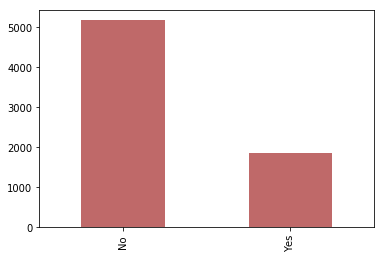

In [70]:
df2.Churn.value_counts().plot(kind="bar", color="brown", alpha=.7)

###### OUT OF 7043 CUSTOMERS 5174 CUSTOMER STAYED WHILE 1869 CHURNED

# PIE CHART OF CHURN & NON CHURNED

Text(0.5,1,'CHURN PIE PLOT')

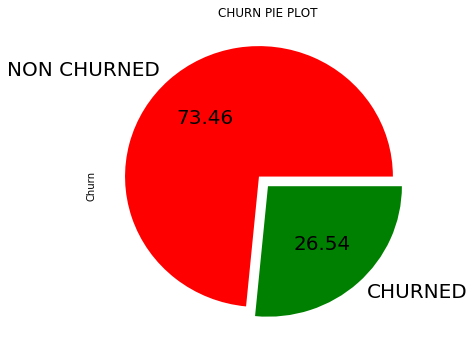

In [71]:
explode = (0.1, 0)
df2.Churn.value_counts().plot.pie(labels=["NON CHURNED","CHURNED"],explode=explode, colors=['r', 'g', 'b', 'c'],\
                                           autopct='%.2f', fontsize=20, figsize=(6, 6))
plt.title("CHURN PIE PLOT")

# PERCENTAGE OF MALE & FEMALE SERVICE USERS

In [72]:
df2.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

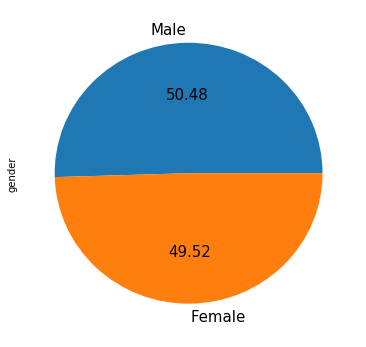

In [73]:
df2.gender.value_counts().plot(kind="pie", autopct='%.2f',figsize=(6,6),fontsize=15)

#  PERCENTAGE OF SENIOR CITIZEN

In [74]:
df2.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [75]:
SC=df2.SeniorCitizen.value_counts()
SC[1]/(SC[0]+SC[1])*100

16.21468124378816

#####SENIOR CITIZENS ARE ONLY 16.21% SO EFFECT ON CHURN WILL BE MINIMAL

# PERCENTAGE OF NON SENIOR CITIZENS

In [76]:
SC=df2.SeniorCitizen.value_counts()
SC[0]/(SC[0]+SC[1])*100

83.78531875621185

# PIE CHART REPRESENTING PERCENTAGE OF SENIOR AND NON SENIOR CITIZEN

In [77]:
gen=df2.groupby(["gender","SeniorCitizen"]).count()
gen

customerID  Partner  Dependents  tenure  PhoneService  \
gender SeniorCitizen                                                          
Female 0                    2920     2920        2920    2920          2920   
       1                     568      568         568     568           568   
Male   0                    2981     2981        2981    2981          2981   
       1                     574      574         574     574           574   

                      MultipleLines  InternetService  OnlineSecurity  \
gender SeniorCitizen                                                   
Female 0                       2920             2920            2920   
       1                        568              568             568   
Male   0                       2981             2981            2981   
       1                        574              574             574   

                      OnlineBackup  DeviceProtection  TechSupport  \
gender SeniorCitizen                                                
Female 0                      2920              2920         2920   
       1                       568               568          568   
Male   0                      2981              2981         2981   
       1                       574               574          574   

                      StreamingTV  StreamingMovies  Contract  \
gender SeniorCitizen                                           
Female 0                     2920             2920      2920   
       1                      568              568       568   
Male   0                     2981             2981      2981   
       1                      574              574       574   

                      PaperlessBilling  PaymentMethod  MonthlyCharges  \
gender SeniorCitizen                                                    
Female 0                          2920           2920            2920   
       1                           568            568             568   
Male   0                          2981           2981            2981   
       1                           574            574             574   

                      TotalCharges  Churn  
gender SeniorCitizen                       
Female 0                      2920   2920  
       1                       568    568  
Male   0                      2981   2981  
       1                       574    574

In [78]:
sns.set(rc={'figure.figsize':(8,8)})

([<matplotlib.patches.Wedge at 0xecf4cf0>,
 [Text(0.318116,1.15707,'BELOW 60 FEMALE'),
  Text(-1.15218,0.33537,'SENIOR FEMALE'),
  Text(-0.321212,-1.15621,'BELOW 60 MALE'),
  Text(1.16088,-0.303899,'SENIOR MALE')],
 [Text(0.185568,0.674955,'41.46%'),
  Text(-0.672107,0.195633,'8.06%'),
  Text(-0.187374,-0.674456,'42.33%'),
  Text(0.677181,-0.177275,'8.15%')])

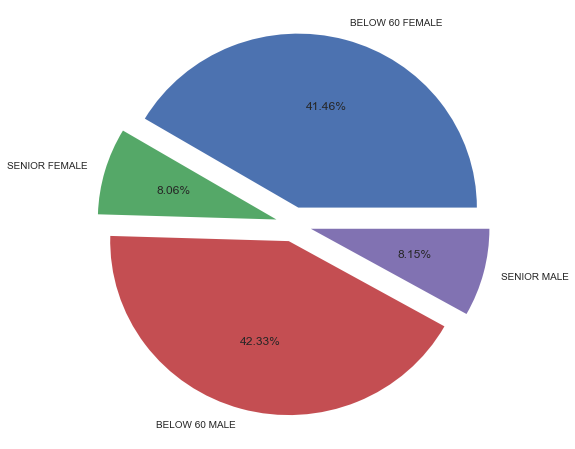

In [79]:

explode = (0.1, 0.1,0.1,0.1)

plt.pie(gen['customerID'].tolist(),labels=['BELOW 60 FEMALE','SENIOR FEMALE',
                                                       'BELOW 60 MALE','SENIOR MALE'],explode=explode,autopct='%1.2f%%')

# SENIOR CITIZEN WHO CHURN

In [80]:
sc_churn=df2[df2.SeniorCitizen==1]["Churn"].value_counts()
sc_churn[1]/(sc_churn[0]+sc_churn[1])*100

41.68126094570928

In [81]:
sc_churn=df2[df2.SeniorCitizen==0]["Churn"].value_counts()    # Here in Total Adult Citizen has 23.60% (1393 people)is Churn Customer, 
                                                            #then its major effect in Adult citizen because
                                                            # Adult has 83.78%  large number as compare to senior citizen.
sc_churn[1]/(sc_churn[0]+sc_churn[1])*100

23.606168446026096

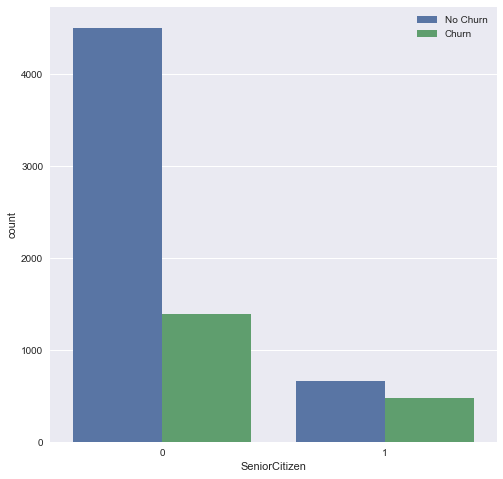

In [82]:
sns.countplot(x='SeniorCitizen', data=df2,hue='Churn')
plt.legend(labels=['No Churn','Churn'])

# PEOPLE WITH & WITHOUT PHONE SERVICE

In [83]:
phone=df2.groupby('PhoneService').count()
phone

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
PhoneService                                                                   
No                   682     682            682      682         682     682   
Yes                 6361    6361           6361     6361        6361    6361   

              MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
PhoneService                                                                 
No                      682              682             682           682   
Yes                    6361             6361            6361          6361   

              DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
PhoneService                                                                
No                         682          682          682              682   
Yes                       6361         6361         6361             6361   

              Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
PhoneService                                                              
No                 682               682            682             682   
Yes               6361              6361           6361            6361   

              TotalCharges  Churn  
PhoneService                       
No                     682    682  
Yes                   6361   6361

([<matplotlib.patches.Wedge at 0xed33910>,
 [Text(1.1449,0.35945,'NO PHONE SERVICE'),
  Text(-1.04949,-0.329496,'WITH PHONE')],
 [Text(0.667858,0.209679,'9.68%'), Text(-0.57245,-0.179725,'90.32%')])

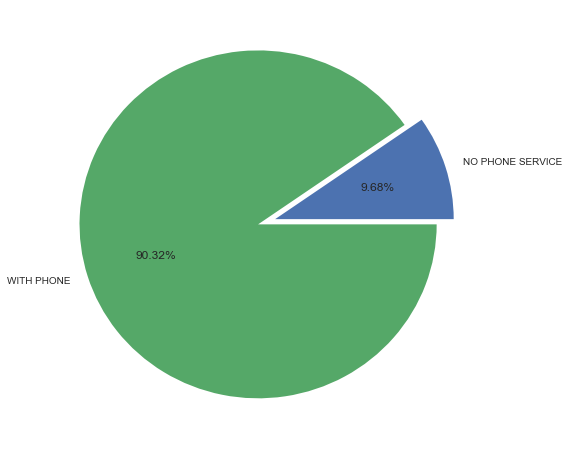

In [84]:
explode = (0.1, 0)
plt.pie(phone['customerID'].tolist(),explode=explode,labels=['NO PHONE SERVICE','WITH PHONE'],autopct='%1.2f%%')

# GENDERWISE PHONE SERVICE ANALYSIS

In [85]:
gender_phone=df2.groupby(["gender","SeniorCitizen","PhoneService"]).count()
gender_phone

customerID  Partner  Dependents  tenure  \
gender SeniorCitizen PhoneService                                            
Female 0             No                   286      286         286     286   
                     Yes                 2634     2634        2634    2634   
       1             No                    45       45          45      45   
                     Yes                  523      523         523     523   
Male   0             No                   292      292         292     292   
                     Yes                 2689     2689        2689    2689   
       1             No                    59       59          59      59   
                     Yes                  515      515         515     515   

                                   MultipleLines  InternetService  \
gender SeniorCitizen PhoneService                                   
Female 0             No                      286              286   
                     Yes                    2634             2634   
       1             No                       45               45   
                     Yes                     523              523   
Male   0             No                      292              292   
                     Yes                    2689             2689   
       1             No                       59               59   
                     Yes                     515              515   

                                   OnlineSecurity  OnlineBackup  \
gender SeniorCitizen PhoneService                                 
Female 0             No                       286           286   
                     Yes                     2634          2634   
       1             No                        45            45   
                     Yes                      523           523   
Male   0             No                       292           292   
                     Yes                     2689          2689   
       1             No                        59            59   
                     Yes                      515           515   

                                   DeviceProtection  TechSupport  StreamingTV  \
gender SeniorCitizen PhoneService                                               
Female 0             No                         286          286          286   
                     Yes                       2634         2634         2634   
       1             No                          45           45           45   
                     Yes                        523          523          523   
Male   0             No                         292          292          292   
                     Yes                       2689         2689         2689   
       1             No                          59           59           59   
                     Yes                        515          515          515   

                                   StreamingMovies  Contract  \
gender SeniorCitizen PhoneService                              
Female 0             No                        286       286   
                     Yes                      2634      2634   
       1             No                         45        45   
                     Yes                       523       523   
Male   0             No                        292       292   
                     Yes                      2689      2689   
       1             No                         59        59   
                     Yes                       515       515   

                                   PaperlessBilling  PaymentMethod  \
gender SeniorCitizen PhoneService                                    
Female 0             No                         286            286   
                     Yes                       2634           2634   
       1             No                          45             45   
                     Yes                        523            523   
Male   0            

([<matplotlib.patches.Wedge at 0xed9e530>,
 [Text(1.09106,0.13995,'FM N.P'),
  Text(0.168321,1.18814,'FM P'),
  Text(-1.04344,0.592645,'SFM N.P'),
  Text(-1.3518,0.364206,'SFM P'),
  Text(-1.09446,-0.110214,'M N.P'),
  Text(-0.168321,-1.18814,'M P'),
  Text(1.06119,-0.560255,'SM N.P'),
  Text(1.36322,-0.318787,'SM P')],
 [Text(0.595124,0.0763362,'4.06%'),
  Text(0.0981872,0.69308,'37.40%'),
  Text(-0.608675,0.34571,'0.64%'),
  Text(-0.869012,0.234133,'7.43%'),
  Text(-0.596981,-0.0601169,'4.15%'),
  Text(-0.0981873,-0.69308,'38.18%'),
  Text(0.619025,-0.326815,'0.84%'),
  Text(0.876357,-0.204935,'7.31%')])

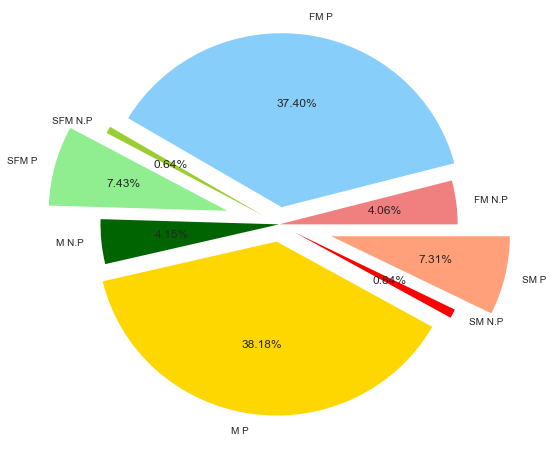

In [86]:
labels=["FM N.P","FM P","SFM N.P","SFM P","M N.P","M P","SM N.P","SM P"]

colors = ['lightcoral', 'lightskyblue','yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
plt.pie(gender_phone['customerID'].tolist(),labels=labels,colors=colors,autopct='%1.2f%%',explode=(0,0.1,0.1,0.3,0,0.1,0.1,0.3))


# PERCETAGE OF PEOPLE WITH DIFFERNT CONTRACT PERIOD

In [87]:
df2['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

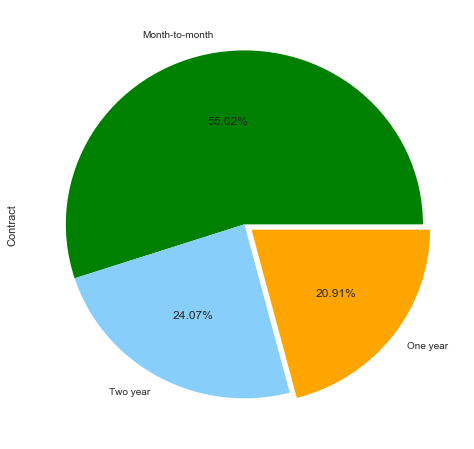

In [88]:
Con_per=df2.Contract.value_counts()/len(df2.Contract) *100
Con_per.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.05),colors= ['green', 'lightskyblue','orange'])

# PERCENTAGE OF BILLING METHOD (PAPERLESS ,NON PAPERLESS)

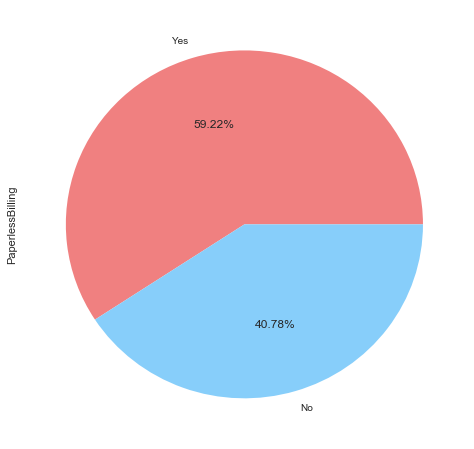

In [89]:
Billing= df2.PaperlessBilling.value_counts() / len(df2.PaperlessBilling) *100
Billing.plot(kind="pie",autopct='%1.2f%%',explode=(0,0),colors= ['lightcoral', 'lightskyblue'])

# PERCETAGE OF PEOPLE STREAMING TV ON INTRNET

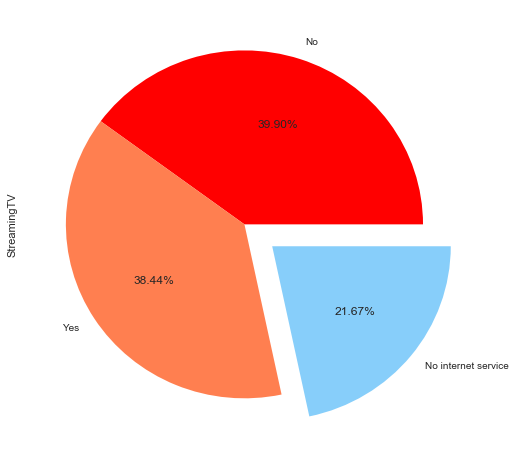

In [90]:
Streaming_movies=df2.StreamingTV.value_counts() / len(df2.StreamingTV) *100
Streaming_movies.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.2),colors= ['red','coral','lightskyblue'])

# PERCENTAGE OF PEOPLE USING TECHSUPPORT

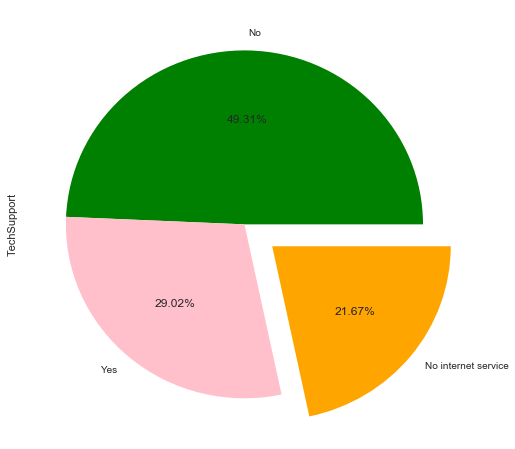

In [91]:
TechSupport= df2.TechSupport.value_counts() / len(df2.TechSupport) *100
TechSupport.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.2),colors= ['green','pink','orange'])

# PERCENTAGE OF PEOPLE USING DEVICE PROTECTION

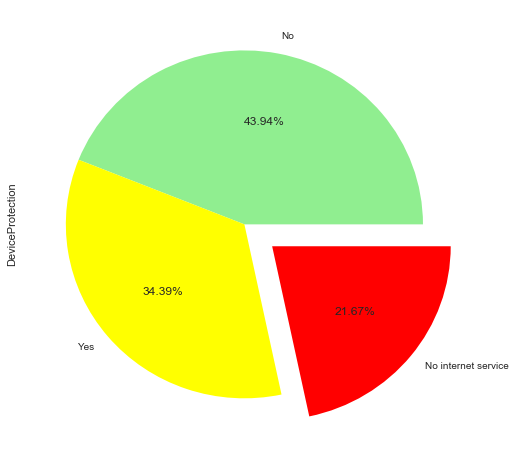

In [92]:
DeviceProtection= df2.DeviceProtection.value_counts() / len(df2.DeviceProtection) *100
DeviceProtection.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.2),colors= ['lightgreen','yellow','red'])

# PERCENTAGE OF PEOPLE USING ONLINE BACKUP

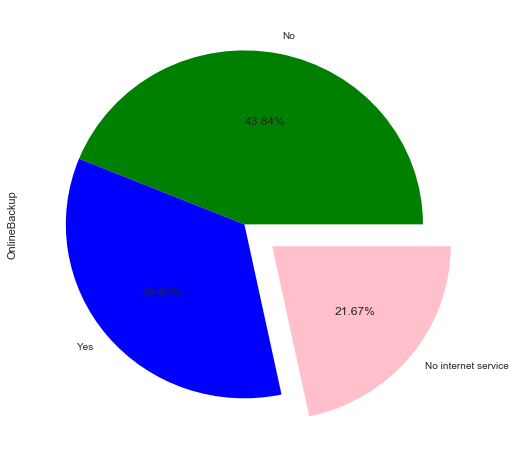

In [93]:
OnlineBackup= df2.OnlineBackup.value_counts() / len(df2.OnlineBackup) *100
OnlineBackup.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.2),colors= ['green','blue','pink'])

# PERCETAGE OF PEOPLE USING ONLINE SECURITY

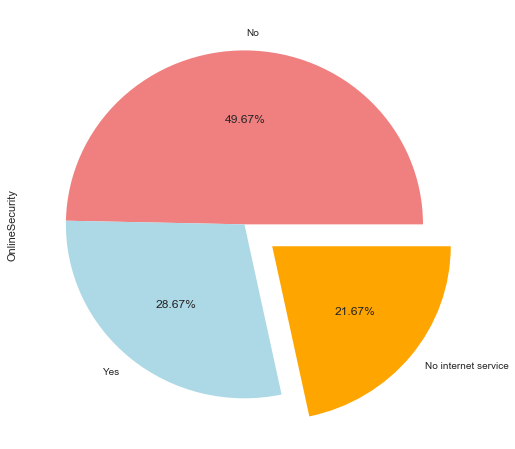

In [94]:
OnlineSecurity= df2.OnlineSecurity.value_counts() / len(df2.OnlineSecurity) *100
OnlineSecurity.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.2),colors= ['lightcoral','lightblue','orange'])

# PERCENTAGE OF PEOPLE USING MULTIPLELINE OR NOT

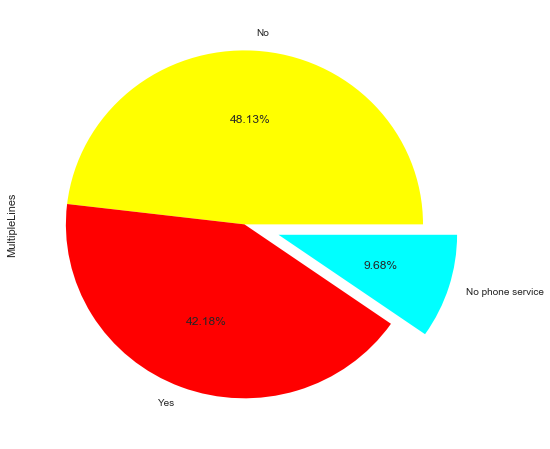

In [95]:
MultipleLines= df2.MultipleLines.value_counts() / len(df2.MultipleLines) *100
MultipleLines.plot(kind="pie",autopct='%1.2f%%',explode=(0,0,0.2),colors= ['yellow','red','cyan'])

# PERCENTAGE OF PEOPLE USING DIFFENT PAYMENT METHODS

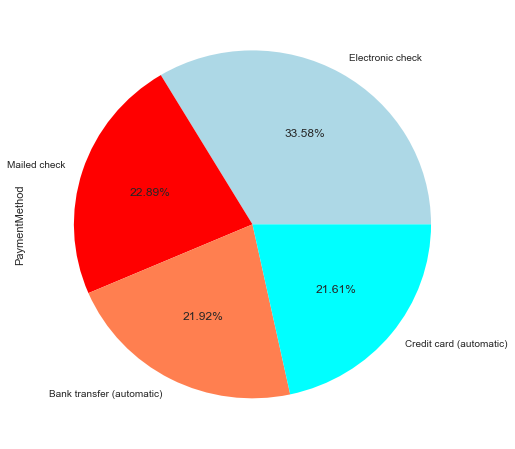

In [96]:
PaymentMethod= df2.PaymentMethod.value_counts() / len(df2.PaymentMethod) *100
PaymentMethod.plot(kind="pie",autopct='%1.2f%%',colors= ['lightblue','red','coral','cyan'])

# PERCENTAGE OF PEOPLE ACCORDING TO DIFFERENT TENURE

([<matplotlib.patches.Wedge at 0xfafb1b0>,
 [Text(0.621668,0.907485,'1year'),
  Text(-0.923929,0.596955,'6year'),
  Text(-0.959623,-0.537703,'2year'),
  Text(-0.253103,-1.07049,'5year'),
  Text(0.537061,-0.959982,'3year'),
  Text(1.03342,-0.376888,'4year'),
  Text(1.09999,-0.0053973,'0Month')],
 [Text(0.339092,0.494992,'30.88%'),
  Text(-0.503961,0.325612,'19.98%'),
  Text(-0.523431,-0.293292,'14.54%'),
  Text(-0.138056,-0.583901,'11.81%'),
  Text(0.292942,-0.523627,'11.81%'),
  Text(0.563683,-0.205575,'10.82%'),
  Text(0.599993,-0.00294398,'0.16%')])

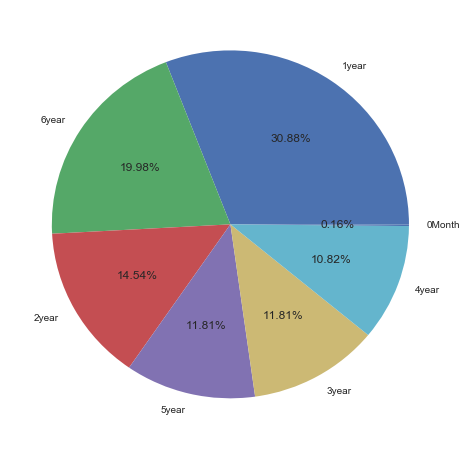

In [97]:
df2['Tenure']=df2["tenure"]/12 
df2["Tenure"]= np.ceil(df2.Tenure)
Tenure_per= df2.Tenure.value_counts() / len(df2.Tenure) *100
plt.pie(df2.Tenure.value_counts(), labels=["1year","6year","2year","5year","3year","4year","0Month"],shadow=False, autopct= '%1.2f%%')

# PERCENTAGE OF PEOPLE USING DIFFERENT SERICES TO ACCESS INTERNET

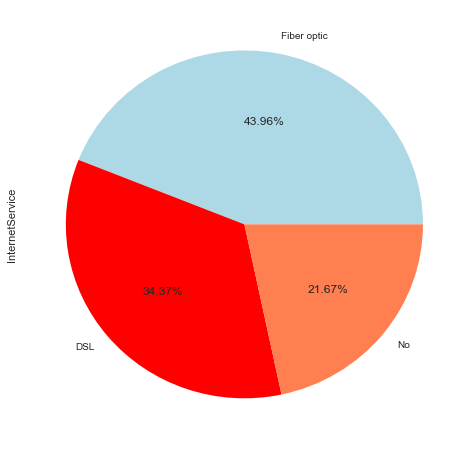

In [98]:
Services=df2.InternetService.value_counts()/len(df2.InternetService) *100
Services.plot(kind="pie",autopct='%1.2f%%',colors= ['lightblue','red','coral','cyan'])

# CHURN ANALYSIS ACCORDING TO INTERNET SERVICES

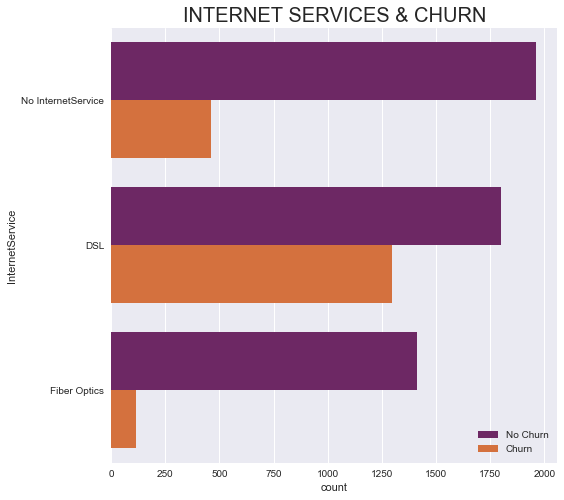

In [99]:
sns.countplot(y='InternetService', data=df2,hue='Churn',palette="inferno")
plt.yticks([0,1,2], ['No InternetService','DSL',"Fiber Optics"])
plt.title("INTERNET SERVICES & CHURN",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])

# CHURN ANALYSIS ACCORDING TO TENURE

Text(0.5,0,'Number of Customer')

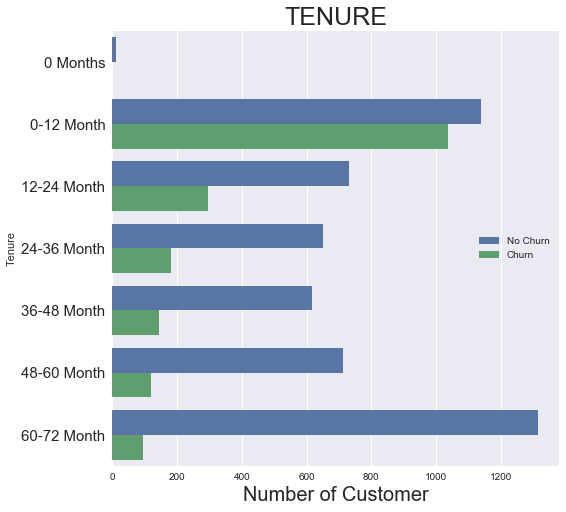

In [100]:
sns.countplot(y='Tenure', data=df2,hue='Churn')
plt.yticks([0,1,2,3,4,5,6], ['0 Months','0-12 Month','12-24 Month','24-36 Month',\
                             '36-48 Month','48-60 Month','60-72 Month'],size=15)
plt.title("TENURE",size=25)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)


# CHURN ANALYSIS ACCORDING TO PAYMENT METHOD

Text(0.5,0,'Number of Customer')

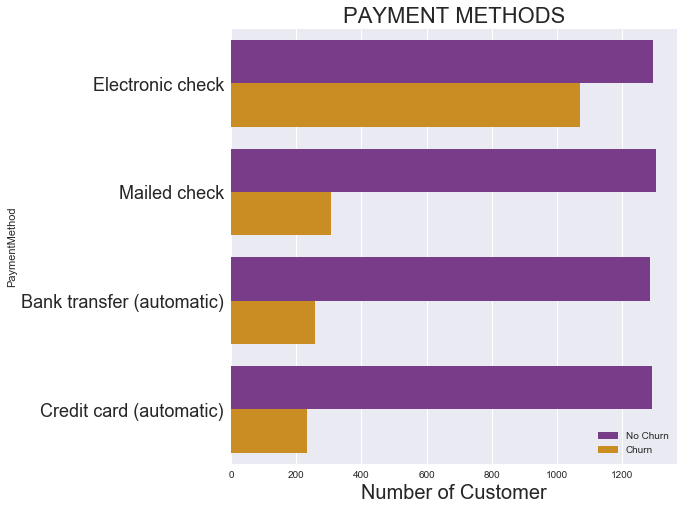

In [101]:
sns.countplot(y='PaymentMethod', data=df2,hue='Churn',palette="CMRmap")
plt.yticks([0,1,2,3], ["Electronic check","Mailed check","Bank transfer (automatic)",\
                       "Credit card (automatic)"],size=18)
plt.title("PAYMENT METHODS",size=22)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)


# CHURN ANALYSIS ACCORDING TO CONTRACT PERIOD

Text(0.5,0,'Number of Customer')

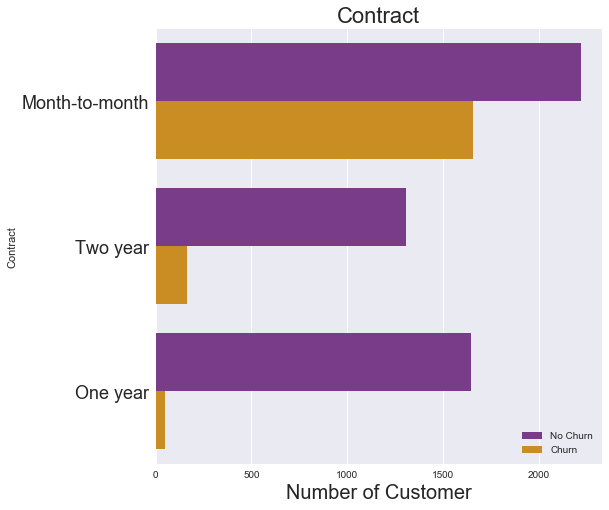

In [102]:
sns.countplot(y='Contract', data=df2,hue='Churn',palette="CMRmap")
plt.yticks([0,2,1], ["Month-to-month","One year","Two year"],size=18)
plt.title("Contract",size=22)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("Number of Customer",size=20)


# CHURN ANALYSIS ACCORDING TO PHONE SERVICE

Text(0,0.5,'Number of Customer')

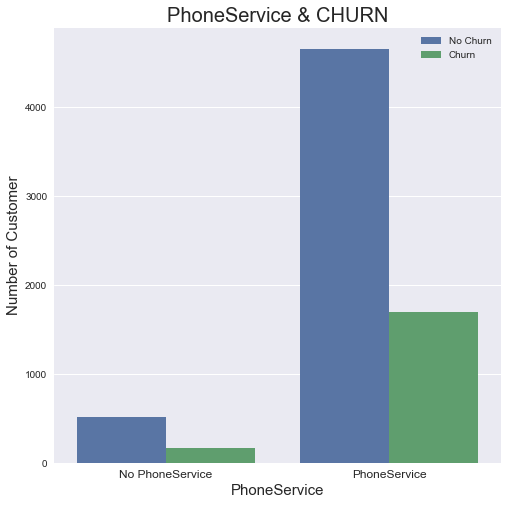

In [103]:
sns.countplot(x='PhoneService', data=df2,hue='Churn')
plt.xticks([0,1], ['No PhoneService','PhoneService'],size=12)
plt.title("PhoneService & CHURN",size=20)
sns.set(style="darkgrid")
plt.legend(labels=['No Churn','Churn'])
plt.xlabel("PhoneService",size=15)
plt.ylabel("Number of Customer",size=15)

# CHURN ANALYSIS ACCORDING TO PAPERLESS BILLING

Text(0,0.5,'Number of Customer')

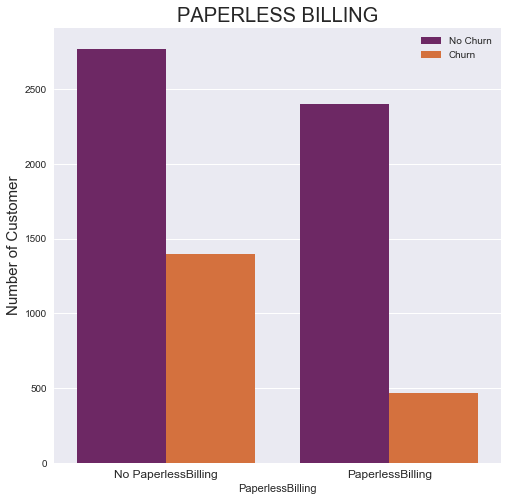

In [104]:
sns.countplot(x='PaperlessBilling', data=df2,hue='Churn',palette="inferno")
plt.xticks([0,1], ['No PaperlessBilling','PaperlessBilling'],size=12)
plt.title("PAPERLESS BILLING",size=20)
plt.legend(labels=['No Churn','Churn'])
plt.ylabel("Number of Customer",size=15)

# PREPROCESSING

# 1) Feature Selection

In [105]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure'],
      dtype='object')

In [106]:
df2.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ...   TechSupport  \
0  No phone service             DSL             No  ...            No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges TotalCharges  Churn Tenure  
0  Electronic check          29.85        29.85     No    1.0  

[1 rows x 22 columns]

# DEFINING NEW DATAFRAME

In [107]:
df3=df2[['gender', 'SeniorCitizen','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'Tenure']]

In [108]:
df3.head(1)

gender  SeniorCitizen PhoneService     MultipleLines InternetService  \
0  Female              0           No  No phone service             DSL   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod Churn  \
0              No  Month-to-month              Yes  Electronic check    No   

   Tenure  
0     1.0

# INFORMATION OF NEW DATAFRAME

In [109]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
Churn               7043 non-null object
Tenure              7043 non-null float64
dtypes: float64(1), int64(1), object(14)
memory usage: 495.2+ KB


# TRANSFORMING DATA

In [110]:
df3['Churn'] = label_encoder.fit_transform(df3['Churn']) 

In [111]:
df3['gender'] = label_encoder.fit_transform(df3['gender']) 

In [112]:
df3['PhoneService'] = label_encoder.fit_transform(df3['PhoneService']) 

In [113]:
df3['PaperlessBilling'] = label_encoder.fit_transform(df3['PaperlessBilling']) 

In [114]:
df3.MultipleLines.replace(['No phone service'],["No"],inplace = True )
df3['MultipleLines'] = label_encoder.fit_transform(df3['MultipleLines']) 

In [115]:
df3["OnlineSecurity"].replace(['No internet service'],['No'],inplace= True)
df3['OnlineSecurity'] = label_encoder.fit_transform(df3['OnlineSecurity'])

In [116]:
df3["OnlineBackup"].replace(['No internet service'],['No'],inplace= True)
df3['OnlineBackup'] = label_encoder.fit_transform(df3['OnlineBackup'])

In [117]:
df3["DeviceProtection"].replace(['No internet service'],['No'],inplace= True)
df3['DeviceProtection'] = label_encoder.fit_transform(df3['DeviceProtection'])

In [118]:
df3["TechSupport"].replace(['No internet service'],['No'],inplace= True)
df3['TechSupport'] = label_encoder.fit_transform(df3['TechSupport'])

In [119]:
df3["StreamingMovies"].replace(['No internet service'],['No'],inplace= True)
df3['StreamingMovies'] = label_encoder.fit_transform(df3['StreamingMovies'])

In [120]:
df3["StreamingTV"].replace(['No internet service'],['No'],inplace= True)
df3['StreamingTV'] = label_encoder.fit_transform(df3['StreamingTV'])

In [121]:
df3.InternetService.replace(['No','Fiber optic','DSL'],[0,1,2],inplace=True)
df3.Contract.replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df3.PaymentMethod.replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[1,2,3,4],inplace=True)

In [122]:
df3.head(4)

gender  SeniorCitizen  PhoneService  MultipleLines  InternetService  \
0       0              0             0              0                2   
1       1              0             1              0                2   
2       1              0             1              0                2   
3       1              0             0              0                2   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  Churn  Tenure  
0                0         0                 1              1      0     1.0  
1                0         1                 0              2      0     3.0  
2                0         0                 1              2      1     1.0  
3                0         1                 0              3      0     4.0

# SPLITTING NEW DATASET

In [123]:
A=df3[['gender',"SeniorCitizen",'InternetService','Tenure','InternetService','OnlineSecurity','DeviceProtection','PhoneService','MultipleLines','Contract', 'PaperlessBilling']]
B=df3['Churn']

In [132]:
from sklearn.cross_validation import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.25)

# PREDICTION & ACCURACY

In [129]:
logreg.fit(A_train,B_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
b_pred=logreg.predict(A_test) 

In [131]:
print(metrics.accuracy_score(B_test, b_pred))

0.760931289040318
